## Why automate your work flow, and how to approach the process

**Questions for students to consider:**

1) In the data exploration section you made some plots from your data. What if you want to look at other relationships? 

2) Are there computational processes you do often? How do you implement these? 

3) Do you have a clear workflow you could replicate from data to conclusions?

4) Could you plug this new data set into your old workflow? 

## Level of Python / Jupiter Automation

1. __Good__ - Documenting all analysis steps in enough details that will enable them to be reproduced successfully.
2. __Better__ - Script your analysis
3. __Best__ - Script your analysis and write tests to validate each step.

### Key takehomes:
    - Code is read much more often that it is written
    - You are NEVER finshed with an analysis (drafts, reviewer comments, new data etc.) 
         Make your own future life easy!
    - Repeating yourself creates opportunity for mistakes

---

## Learning Objectives of Automation Module:

### [Lesson 1](#lesson-1) (10-15 min)
- Employ best practices of naming a variable including: don’t use existing function names, avoid periods in names, don’t use numbers at the beginning of a variable name.
- Defensive programming: catch errors instead of just fixing them.

### [Lesson 2](#lesson-2) (10-15 min)
- Define "Don't Repeat Yourself" (DRY) and provide examples of how you would implement DRY in your code
- Identify code that can be modularized following DRY and implement a modular workflow using functions.

### [Lesson 3](#lesson-3) (60 min)
- Know how to construct a function: variables, function name, syntax, documentation, return values
- Demonstrate use of function within the notebook / code. 
- Construct and compose function documentation that clearly defines inputs, output variables and behaviour.



__Basic Overview of the suggested workflow using Socrative (Optional)__

- Use Socrative quiz to collect answers from student activities (students can run their code in their notebooks, and post to socrative). This will allow the instructor to see what solutions students came up with, and identify any places where misconceptions and confusion are coming up. Using Socrative quizes also allows for a record of the student work to be analyzed after class to see how students are learning and where they are having troubles.
- sharing of prepared Socrative Quizes designed to be used with the automation module can be shared by URL links to each teacher so they do not have to be remade.

---

### Setup

__Please download the cleaned data file:__

https://raw.githubusercontent.com/Reproducible-Science-Curriculum/automation-RR-Jupyter/gh-pages/notebooks/gapminder_cleaned.csv

---

# Lesson 1 <a id="lesson-1"></a>
---

Lets begin by creating a new Jupyter notebook.

__Question:__ 

- Accounding to the organization we setup where should we put this notebook?

## Review of good variable practices
**Learning Objective: ** Employ best practices of naming a variable including: don’t use existing function names, avoid periods in names, don’t use numbers at the beginning of a variable name

### Types of variables:
- strings, integers, etc..

References:
- PEP8 - Style Guide for Python Code  - https://www.python.org/dev/peps/pep-0008/ 
- https://www.tutorialspoint.com/python3/python_variable_types.htm

### Keep in mind that code is read many more times then it is written!

## Naming conventions that should be followed
**Rules**


In [1]:
# write out three variables, assign a number, string, list 
x = 'Asia' # String
y = 1952  # an integer
z = 1.5 # a floating point number

cal_1 = y * z
print(cal_1)

# or
x, y = 'Asia', 'Africa'
w = x
w = x + x #concatinating strings (combinging strings)
print(w)

h = 'Africa'

list_1 = ['Asia', 'Africa', 'Europe'] # list
print(list_1)

2928.0
AsiaAsia
['Asia', 'Africa', 'Europe']


__Questions for students:__
1. what do you think will happen with this code? x * z
1. what do you think will happen with this code? list_1[0]
1. what do you think will happen with this code? list_1[1:2]

## Lists and Indexing

Python indexing is from 0 to length of list - 1

**Example:** 

    list_1 = ['Asia', 'Africa', 'Europe']

Asia index = 0, 
Africa index = 1,  
Europe index = 2

*list_1* is not a very descriptive and identifiable variable.

What would be a better name for the variable that holds these values?

In [2]:
countries = ['Asia', 'Africa', 'Europe'] 

## Scope of Variables

###  Global variables 
Global variables are available in the environment your script is working in. Every variable we have made at this point is a global variable.

###  Local variables 
Local variables will be useful to understand when we start using functions in the automation of our code. Local variables only exist in the function environment, not the global environment your linear workflow code is. 

## Other useful conventions with variables to follow
1. Set-up variables at the begining of your page, after importing libraries
2. use variables instead of file names, or exact values or strings so that if you need to change the value of something you don't have to search through all your code to make sure you made the change everywhere, simply change the value of the variable at the top. -- This will also make your code more reproducible in the end. 

See what variants exist in the Jupyter notebook:
    
    %who

In [3]:
%who

cal_1	 countries	 h	 list_1	 w	 x	 y	 z	 


## Let's Get Started

To get started we will import the python modules that we will use in the session. These modules are developed by programmers and made available as open source packages for python. We would normally have to install each of these ourself but they are included as part of the [Anaconda Python Distribution](https://www.continuum.io/downloads).

The _%matplotlib inline_ statement is part of the Jupyter and IPython magic that enables plaots generated by the matplotlib package to be discplayed as output in the Jupyter Notebook instead of open in a separate window.

In [2]:
import numpy as np
import pandas as pd
import pylab as plt
import matplotlib

%matplotlib inline

We will continue where the _data exploration_ module left off but importing the cleaned gapminder dataset and setting it equal to a new varaible named __df__ to denote that we have imported a _pandas_ dataframe.

As validation that we have imported the data we will also look at the top five rows of data using the _head_ method of pandas.

# Defensive programming

In [23]:
cleaned_data_location = 'data/gapminder_cleaned.csv'
df = pd.read_csv(cleaned_data_location)
df.head()

FileNotFoundError: File b'data/gapminder_cleaned.csv' does not exist

Whooops! That doesn't look great. and we know that the file *does* exist. We just downloaded it!
Lets do some defensive programming to prevent things from breaking

Your most common collaborator is YOU, in the future. Including error handling and messages help your colleagues and students, but most importantly, YOU.


In [24]:
cleaned_data_location = 'data/gapminder_cleaned.csv'
try:
        df = pd.read_csv(cleaned_data_location)
except FileNotFoundError:
        print("Couldn't find data file, check path? You tried", cleaned_data_location)

Couldn't find data file, check path? You tried data/gapminder_cleaned.csv


Exercise: what do you need to fix to actually open that data file?

In [26]:
cleaned_data_location = '../data/gapminder_cleaned.csv'
try:
        df = pd.read_csv(cleaned_data_location)
except FileNotFoundError:
        print("Couldn't find data file, check path? You tried", cleaned_data_location)

You can use global flags to control how much you want to see

we can set a flag at the top of our script to set how much infomation we want to see.
e.g. VERBOSE

In [27]:
VERBOSE = 1

In [33]:
try:
        df = pd.read_csv(cleaned_data_location)
        if VERBOSE:
            print(df.head())
except FileNotFoundError:
        print("Couldn't find data file, check path? You tried", cleaned_data_location)


   year       pop  lifeexp   gdppercap      country continent
0  1952   8425333   28.801  779.445314  afghanistan      asia
1  1957   9240934   30.332  820.853030  afghanistan      asia
2  1962  10267083   31.997  853.100710  afghanistan      asia
3  1967  11537966   34.020  836.197138  afghanistan      asia
4  1972  13079460   36.088  739.981106  afghanistan      asia


In [22]:
years = df['year'].unique()
years.sort()
assert years[-1]==2007


# Lesson 2 (10-15 min)<a id="lesson-2"></a>
---

__Learning Objectives__
- Define "Don't Repeat Yourself" (DRY) and provide examples of how you would implement DRY in your code
- Identify code that can be modularized following DRY and implement a modular workflow using functions.

As you write software there comes a time when you are going to encounter a situation where you want to do the same analysis step as you have already done in your analysis. Our natural tendancy is the copy the code that we wrote and paste it into teh new location for reuse.  Sounds easy, right. Copy, paste, move on...not so fast.

What happens if there is a problem with the code or you decide to tweak it, just a little, to change a format or enahce it?

You wil have to change the code in every place you ahve copied it. How do you know if you got _all_ of the copies? What happens if one of the copies is _not_ changed?

These examples illustrate the principle of "Don't Repeat Yourself". We are going to look at how to __refactor__ our code and pull pieces out by making them functions. They we will __call__ the function everytime we want to use that code.

# What if we want to ask questions about variables over time?
## Lets start with mean life expectancy in Asia

In [60]:
# Define which continent / category we will use
category = 'lifeexp'
continent = 'asia'

In [61]:
# Create a mask that selects the continent of choice
mask_continent = df['continent'] == continent
df_continent = df[mask_continent]

In [62]:
# Loop through years and calculate the statistic of interest
# In this
years = df_continent['year'].unique()
summary = []

for year in years:
    mask_year = df_continent['year'] == year
    df_year = df_continent[mask_year]
    value = np.mean(df_year[category])
    summary.append((continent, year, value))
    
# Turn the summary into a dataframe so that we can visualize easily
summary = pd.DataFrame(summary, columns=['continent', 'year', category])

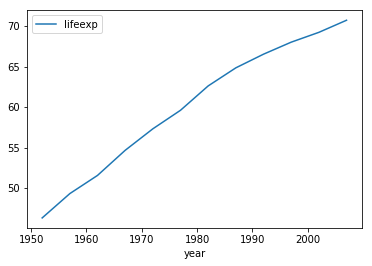

In [63]:
summary.plot.line('year', 'lifeexp')

# Lesson 3 <a id="lesson-3"></a>
---

__Learning Objectives__
- Know how to construct a function: variables, function name, syntax, documentation, return values
- Demonstrate use of function within the notebook / code.
- Construct and compose function documentation that clearly defines inputs, output 

In [64]:
def calculate_mean_over_time(data, category, continent):
    
    # Create a mask that selects the continent of choice
    mask_continent = data['continent'] == continent
    data_continent = data[mask_continent]

    # Loop through years and calculate the statistic of interest
    years = data_continent['year'].unique()
    summary = []
    for year in years:
        mask_year = data_continent['year'] == year
        data_year = data_continent[mask_year]
        value = np.mean(data_year[category])
        summary.append((continent, year, value))

    # Turn the summary into a dataframe so that we can visualize easily
    summary = pd.DataFrame(summary, columns=['continent', 'year', category])
    return summary

In [65]:
calculate_mean_over_time(df, "lifeexp", "asia")

,continent,year,lifeexp
0,asia,1952,46.314394
1,asia,1957,49.318544
2,asia,1962,51.563223
3,asia,1967,54.663640
4,asia,1972,57.319269
5,asia,1977,59.610556
6,asia,1982,62.617939
7,asia,1987,64.851182
8,asia,1992,66.537212
9,asia,1997,68.020515


# Activity:
    How would you make a function to calculate the median through time?
    (Hint: focus on DRY)

In [66]:
def calculate_statistic_over_time(data, category, continent, func):
    
    # Create a mask that selects the continent of choice
    mask_continent = data['continent'] == continent
    data_continent = data[mask_continent]

    # Loop through years and calculate the statistic of interest
    years = data_continent['year'].unique()
    summary = []
    for year in years:
        mask_year = data_continent['year'] == year
        data_year = data_continent[mask_year]
        value = func(data_year[category])
        summary.append((continent, year, value))

    # Turn the summary into a dataframe so that we can visualize easily
    summary = pd.DataFrame(summary, columns=['continent', 'year', category])
    return summary

In [67]:
calculate_statistic_over_time(df, "lifeexp", "asia", np.median)

,continent,year,lifeexp
0,asia,1952,44.869
1,asia,1957,48.284
2,asia,1962,49.325
3,asia,1967,53.655
4,asia,1972,56.950
5,asia,1977,60.765
6,asia,1982,63.739
7,asia,1987,66.295
8,asia,1992,68.690
9,asia,1997,70.265


In [68]:
def calculate_statistic_over_time(data, category, continent, func):
    """calculate values of a statistic through time

    Args:
        data: a data frame
        category: one of the column headers of the data frame (e.g. 'lifeexp')
        continent: possible value of the continent column of that data frame (e.g. 'asia')
        func: the funtion to apply to data values (e.g. np.mean)
        
    Returns:
        a summary table of value per year.

    """
    
    # Create a mask that selects the continent of choice
    mask_continent = data['continent'] == continent
    data_continent = data[mask_continent]

    # Loop through years and calculate the statistic of interest
    years = data_continent['year'].unique()
    summary = []
    for year in years:
        mask_year = data_continent['year'] == year
        data_year = data_continent[mask_year]
        value = func(data_year[category])
        summary.append((continent, year, value))

    # Turn the summary into a dataframe so that we can visualize easily
    summary = pd.DataFrame(summary, columns=['continent', 'year', category])
    return summary

# Defensive programming activity
How would you check to make sure input values are reasonable?
Use assertions or try-except statements, and add options with the VERBOSE flag

In [95]:
def calculate_statistic_over_time(data, category, continent, func):
    """calculate values of a statistic through time

    Args:
        data: a data frame
        category: one of the column headers of the data frame (e.g. 'lifeexp')
        continent: possible value of the continent column of that data frame (e.g. 'asia')
        func: the funtion to apply to data values (e.g. np.mean)
        
    Returns:
        a summary table of value per year.

    """
    # Create a mask that selects the continent of choice
    assert continent in data['continent'].unique()
    mask_continent = data['continent'] == continent
    data_continent = data[mask_continent]

    # Loop through years and calculate the statistic of interest
    years = data_continent['year'].unique()
    if VERBOSE:
        print("years include", years)
    summary = []
    for year in years:
        mask_year = data_continent['year'] == year
        data_year = data_continent[mask_year]
        value = func(data_year[category])
        summary.append((continent, year, value))

    # Turn the summary into a dataframe so that we can visualize easily
    summary = pd.DataFrame(summary, columns=['continent', 'year', category])
    return summary

In [90]:
import sys

In [96]:
VERBOSE = 1
calculate_statistic_over_time(df, "lifeexp", "asia", np.median)

years include [1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 2002 2007]


,continent,year,lifeexp
0,asia,1952,44.869
1,asia,1957,48.284
2,asia,1962,49.325
3,asia,1967,53.655
4,asia,1972,56.950
5,asia,1977,60.765
6,asia,1982,63.739
7,asia,1987,66.295
8,asia,1992,68.690
9,asia,1997,70.265


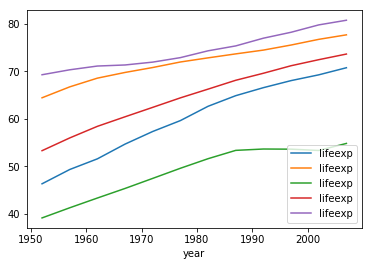

In [46]:
continents = df['continent'].unique()

fig, ax = plt.subplots()
for continent in continents:
    output = calculate_statistic_over_time(df, category, continent, np.mean)
    output.plot.line('year', category, ax=ax)

[None, None, None, None, None, None, None, None, None, None]

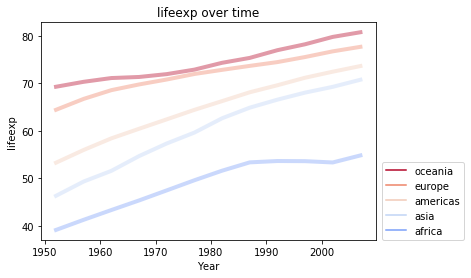

In [14]:
category = 'lifeexp'
mean_values = df.groupby('continent').mean()[category]
mean_values = mean_values.sort_values(ascending=False)
continents = mean_values.index.values

n_continents = len(continents)
cmap = plt.cm.coolwarm_r

fig, ax = plt.subplots()
for ii, continent in enumerate(continents):
    this_color = cmap(float(ii / n_continents))
    output = calculate_statistic_over_time(df, category, continent)
    output.plot.line('year', category, ax=ax, label=continent,
                     color=this_color)
    plt.legend(loc=(1.02, 0))
    ax.set(ylabel=category, xlabel='Year',
           title='{} over time'.format(category))
    
plt.setp(ax.lines, lw=4, alpha=.4)

In [1]:
def plot_statistic_over_time(data, category, func="mean",
                             cmap=None, ax=None, legend=True,
                             sort=True):
    if ax is None:
        fig, ax = plt.subplots()
    if cmap is None:
        cmap = plt.cm.viridis
    if func == "np.mean":
        func = np.mean
        
    
    if sort is True:
        # Sort the continents by the category of choice
        mean_values = df.groupby('continent').mean()[category]
        mean_values = mean_values.sort_values(ascending=False)
        continents = mean_values.index.values
    else:
        continents = np.unique(df['continent'])
    n_continents = len(continents)

    # Loop through continents, calculate its stat, and add a line
    for ii, continent in enumerate(continents):
        this_color = cmap(float(ii / n_continents))
        output = calculate_statistic_over_time(data, category, continent)
        output.plot.line('year', category, ax=ax, label=continent,
                         color=this_color)
        if legend is True:
            plt.legend(loc=(1.02, 0))
        else:
            ax.get_legend().set(visible=False)
        ax.set(ylabel=category, xlabel='Year',
               title='{} over time'.format(category))

    plt.setp(ax.lines, lw=4, alpha=.4)
    return ax

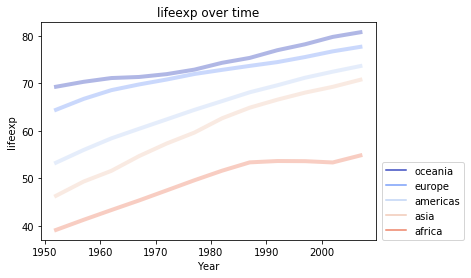

In [16]:
plot_statistic_over_time(df, category, cmap=plt.cm.coolwarm)

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
categories = ['pop', 'gdppercap']
for ax, i_category in zip(axs, categories):
    plot_statistic_over_time(df, i_category, continent,
                             ax=ax, sort=False)
plt.setp(axs[0].get_legend(), visible=False)
plt.tight_layout()

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
cmaps = [plt.cm.viridis, plt.cm.coolwarm]
for ax, cmap in zip(axs, cmaps):
    plot_statistic_over_time(df, category, continent,
                             cmap=cmap, ax=ax, legend=False)

In [ ]:
ax = df.groupby(['continent', 'year']).mean()['lifeexp']\
       .unstack('continent').plot(cmap=plt.cm.viridis, alpha=.4, lw=3)

# Lesson 4 <a id="lesson-4"></a>
---

__Learning Objective__
- Organize a set of functions within a python (.py) script and use it (import it into) in a Jupyter notebook.

Now we are going to cut and paste the functions that we have created above. We are going to save them to a single file so we will paste all of the code that we want in that file below. Additionally, we will use the Jupyter / IPython magic, specifically the magic command _writefile_ to save teh contents of the cell below to a file. The file name follows the _%%writefile_ command below.

We are assuming that the notebook is in the project code directory and notebook subdirectory.

In [ ]:
%%writefile stats_and_plot.py
def calculate_statistic_over_time(data, category, continent, func=None):
    import numpy as np
    import pandas as pd

    if func is None:
        func = np.mean
        
    # Create a mask that selects the continent of choice
    mask_continent = data['continent'] == continent
    data_continent = data[mask_continent]

    # Loop through years and calculate the statistic of interest
    years = data_continent['year'].unique()
    summary = []
    for year in years:
        mask_year = data_continent['year'] == year
        data_year = data_continent[mask_year]
        value = func(data_year[category])
        summary.append((continent, year, value))

    # Turn the summary into a dataframe so that we can visualize easily
    summary = pd.DataFrame(summary, columns=['continent', 'year', category])
    return summary


def plot_statistic_over_time(data, category, func=None, cmap=None, ax=None, legend=True, sort=True):
    if ax is None:
        fig, ax = plt.subplots()
    if cmap is None:
        cmap = plt.cm.viridis
    
    if sort is True:
        # Sort the continents by the category of choice
        mean_values = df.groupby('continent').mean()[category]
        mean_values = mean_values.sort_values(ascending=False)
        continents = mean_values.index.values
    else:
        continents = np.unique(df['continent'])
    n_continents = len(continents)

    # Loop through continents, calculate its stat, and add a line
    for ii, continent in enumerate(continents):
        this_color = cmap(float(ii / n_continents))
        output = calculate_statistic_over_time(data, category, continent)
        output.plot.line('year', category, ax=ax, label=continent,
                         color=this_color)
        if legend is True:
            plt.legend(loc=(1.02, 0))
        else:
            ax.get_legend().set(visible=False)
        ax.set(ylabel=category, xlabel='Year',
               title='{} over time'.format(category))

    plt.setp(ax.lines, lw=4, alpha=.4)
    return ax

If you would like to see the contents of your file you can type:
    
    %load stats_and_plot.py
    
    or try
    
    %pycat stats_and_plot.py

## Imports

**Some information on _imports_:**

In order to use external code within python two things have to happen: 1) The code has to exist on you local computer and 2) we have to reference or import to code to use it in our program.

The first requirement is satisfied when we install the softwre on our computer using _conda_ or _pip_. Or as we will see in a minute, we can create custom functions that we create. Secondly, we need to tell python how to access and refer to the packages or source code we want to use.

**Import Guidelines**

https://www.python.org/dev/peps/pep-0008/#imports

Imports should be grouped in the following order:

- standard library imports
- related third party imports
- local application/library specific imports

You should put a blank line between each group of imports.

In [ ]:
from stats_and_plot import calculate_statistic_over_time

# Saving for publication
cmaps = [plt.cm.magma, plt.cm.rainbow]
for ii, cmap in enumerate(cmaps):
    fig, ax = plt.subplots(figsize=(10, 10), sharey=True)
    plot_statistic_over_time(df, category, continent,
                             cmap=cmap, ax=ax, legend=False)
    labels = [ax.get_xticklabels(), ax.get_yticklabels(),
              ax.yaxis.label, ax.xaxis.label, ax.title]
    _ = plt.setp(labels, fontsize=30)
#     ax.set_axis_off()
    fig.savefig('fig_{}.png'.format(ii), transparent=True, bbox_inches='tight', dpi=300)

Lets get some help on our new code:

In [ ]:
calculate_statistic_over_time?

In [ ]:
help(calculate_statistic_over_time)

### Docstring

Get details on DocStrings [here](https://www.python.org/dev/peps/pep-0257/).

In [ ]:
"""Form a complex number.

    Keyword arguments:
    real -- the real part (default 0.0)
    imag -- the imaginary part (default 0.0)
    """

In [ ]:
%%writefile stats_and_plot.py
def calculate_statistic_over_time(data, category, continent, func=None):
    """
    Calculate a statistic on the continent. The default statistic is numpys' mean.
    
    Keyword arguments:
    data -- the dataframe data source
    category -- the category to be summarized
    continent -- the continent to be examined
    func -- the function to be applied to the data (default numpy.mean)
    """
    import numpy as np
    import pandas as pd

    if func is None:
        func = np.mean
        
    # Create a mask that selects the continent of choice
    mask_continent = data['continent'] == continent
    data_continent = data[mask_continent]

    # Loop through years and calculate the statistic of interest
    years = data_continent['year'].unique()
    summary = []
    for year in years:
        mask_year = data_continent['year'] == year
        data_year = data_continent[mask_year]
        value = func(data_year[category])
        summary.append((continent, year, value))

    # Turn the summary into a dataframe so that we can visualize easily
    summary = pd.DataFrame(summary, columns=['continent', 'year', category])
    return summary


def plot_statistic_over_time(data, category, func=None, cmap=None, ax=None, legend=True, sort=True):
    if ax is None:
        fig, ax = plt.subplots()
    if cmap is None:
        cmap = plt.cm.viridis
    
    if sort is True:
        # Sort the continents by the category of choice
        mean_values = df.groupby('continent').mean()[category]
        mean_values = mean_values.sort_values(ascending=False)
        continents = mean_values.index.values
    else:
        continents = np.unique(df['continent'])
    n_continents = len(continents)

    # Loop through continents, calculate its stat, and add a line
    for ii, continent in enumerate(continents):
        this_color = cmap(float(ii / n_continents))
        output = calculate_statistic_over_time(data, category, continent)
        output.plot.line('year', category, ax=ax, label=continent,
                         color=this_color)
        if legend is True:
            plt.legend(loc=(1.02, 0))
        else:
            ax.get_legend().set(visible=False)
        ax.set(ylabel=category, xlabel='Year',
               title='{} over time'.format(category))

    plt.setp(ax.lines, lw=4, alpha=.4)
    return ax

# Lesson 5 <a id="lesson-5"></a>
---

__Optional lesson__
- Use asserts to test validity of function inputs and outputs


### Python Testing

In [ ]:
import pytest

In [ ]:
# Check to see if pytest is installed:
pytest.__version__

In [ ]:
# content of test_sample.py
def func(x):
    return x + 1

def test_answer():
    assert func(3) == 5

In [ ]:
!pytest

In [ ]:
pytest.assert?

## Python 3 Syntax

A nice, very brief intro to the syntax of the Python 3 programming language can be viewed here:
    
https://learnxinyminutes.com/docs/python3/